Digite a função a ser integrada, f(x): x**3-5
Digite o limite inferior de integração (a): 0
Digite o limite superior de integração (b): 0.8
Digite o número de pontos de Gauss (n): 2

Integral exata: -3.89760000
Integral aproximada usando Quadratura de Gauss com 2 pontos: -3.89760000
Erro absoluto: 0.00e+00

Tabela de Nós e Pesos da Quadratura de Gauss:
 i |       x_i (nó)       |      c_i (peso)     
------------------------------------------------
 1 |    0.169059892324    |    1.000000000000   
 2 |    0.630940107676    |    1.000000000000   


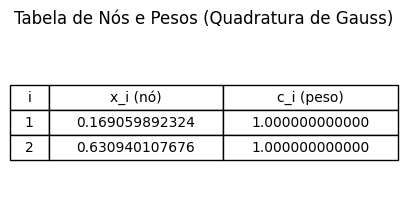

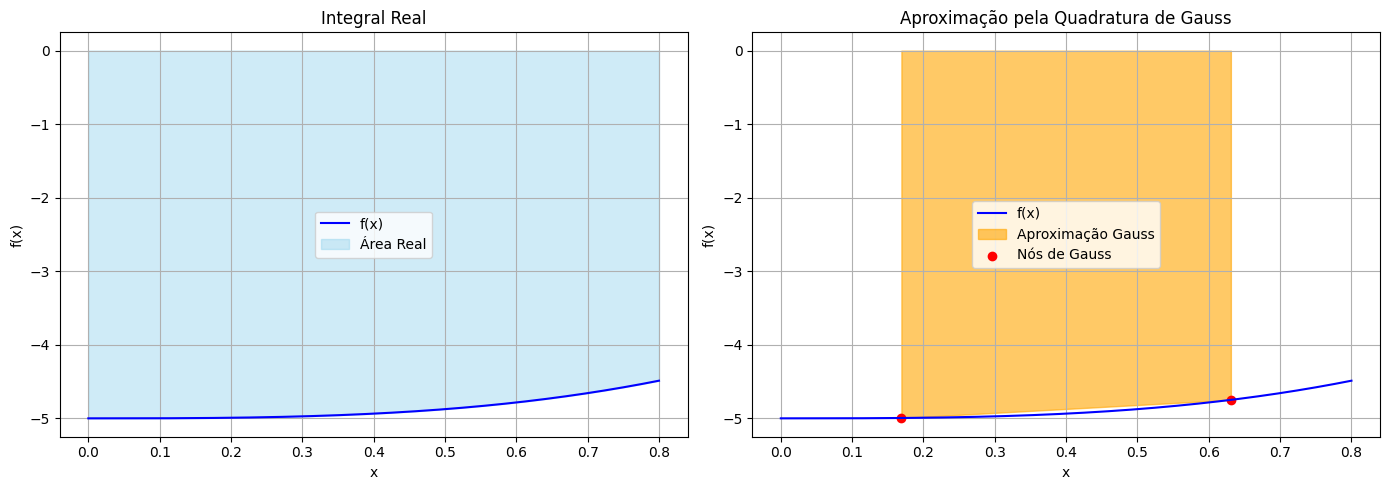

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Função para calcular a integral usando Quadratura de Gauss
def quadratura_gauss(func, a, b, n):
    pontos, pesos = np.polynomial.legendre.leggauss(n)

    def phi(t):
        return ((b - a) / 2) * t + (a + b) / 2

    pontos_transformados = [phi(p) for p in pontos]
    integral = 0.0
    for i in range(n):
        valor = func(pontos_transformados[i])
        try:
            valor_float = float(np.atleast_1d(valor)[0])
        except Exception as e:
            raise TypeError(f"Erro ao avaliar a função em x = {pontos_transformados[i]}: {e}")
        integral += pesos[i] * valor_float

    integral *= (b - a) / 2
    return integral, pontos_transformados, pesos

# Função para calcular a integral exata
def integral_exata(func, a, b):
    integral = sp.integrate(func, (sp.Symbol('x'), a, b))
    return float(integral)

# Função para calcular o erro
def erro_integral(integral_exata, integral_aproximada):
    return abs(integral_exata - integral_aproximada)

# Função para exibir tabela textual no terminal
def exibir_tabela_pesos_pontos(pontos, pesos):
    print("\nTabela de Nós e Pesos da Quadratura de Gauss:")
    print(f"{'i':>2} | {'x_i (nó)':^20} | {'c_i (peso)':^20}")
    print("-" * 48)
    for i, (x_i, c_i) in enumerate(zip(pontos, pesos)):
        print(f"{i+1:>2} | {x_i:^20.12f} | {c_i:^20.12f}")

# Função para plotar tabela visual com matplotlib
def plotar_tabela_pesos_pontos(pontos, pesos):
    fig, ax = plt.subplots(figsize=(5, 0.6 * len(pontos) + 1))
    ax.axis('off')
    table_data = [["i", "x_i (nó)", "c_i (peso)"]]
    for i, (x_i, c_i) in enumerate(zip(pontos, pesos)):
        table_data.append([str(i+1), f"{x_i:.12f}", f"{c_i:.12f}"])

    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.1, 0.45, 0.45])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    plt.title("Tabela de Nós e Pesos (Quadratura de Gauss)", fontsize=12, pad=10)
    plt.show()

# Função para plotar a comparação da área
def plotar_comparacao(func, a, b, pontos_gauss, pesos_gauss):
    x_vals = np.linspace(a, b, 1000)
    y_vals = func(x_vals)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Gráfico da integral real
    axs[0].plot(x_vals, y_vals, label='f(x)', color='blue')
    axs[0].fill_between(x_vals, y_vals, color='skyblue', alpha=0.4, label='Área Real')
    axs[0].set_title('Integral Real')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('f(x)')
    axs[0].legend()
    axs[0].grid(True)

    # Gráfico da aproximação de Gauss
    pontos_y = [func(p) for p in pontos_gauss]
    ordenados = sorted(zip(pontos_gauss, pontos_y))
    xg, yg = zip(*ordenados)

    axs[1].plot(x_vals, y_vals, label='f(x)', color='blue')
    axs[1].fill_between(xg, yg, color='orange', alpha=0.6, label='Aproximação Gauss')
    axs[1].scatter(pontos_gauss, pontos_y, color='red', label='Nós de Gauss')
    axs[1].set_title('Aproximação pela Quadratura de Gauss')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('f(x)')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Execução principal
if __name__ == '__main__':
    from sympy import lambdify, Symbol, sympify

    expr = input("Digite a função a ser integrada, f(x): ")

    # Substituições automáticas
    expr = expr.replace('sen', 'sin').replace('ln', 'log').replace('e^', 'exp')

    a = float(input("Digite o limite inferior de integração (a): "))
    b = float(input("Digite o limite superior de integração (b): "))
    n = int(input("Digite o número de pontos de Gauss (n): "))

    x = Symbol('x')
    func_expr = sympify(expr)
    f = lambdify(x, func_expr, 'numpy')

    resultado, pontos_gauss, pesos_gauss = quadratura_gauss(f, a, b, n)
    resultado_exato = integral_exata(func_expr, a, b)
    erro = erro_integral(resultado_exato, resultado)

    print(f"\nIntegral exata: {resultado_exato:.8f}")
    print(f"Integral aproximada usando Quadratura de Gauss com {n} pontos: {resultado:.8f}")
    print(f"Erro absoluto: {erro:.2e}")

    # Tabelas
    exibir_tabela_pesos_pontos(pontos_gauss, pesos_gauss)     # versão textual
    plotar_tabela_pesos_pontos(pontos_gauss, pesos_gauss)     # versão gráfica

    # Gráfico da função e aproximação
    plotar_comparacao(f, a, b, pontos_gauss, pesos_gauss)
